In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')
matches.info()
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [ ]:
matches['date'] = pd.to_datetime(matches['date'])  # Convert 'date' to datetime
matches['result_margin'] = matches['result_margin'].fillna(0)  # Fill missing result_margin
matches.set_index('date', inplace=True)  # Set 'date' as the index

In [ ]:
# Resample result_margin monthly
result_margin_series = matches['result_margin'].resample('M').mean()

<ipython-input-16-3bbf8a4964ab>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  result_margin_series = matches['result_margin'].resample('M').mean()


In [ ]:
# Preprocess deliveries dataset
# Aggregate total runs by match_id
total_runs = deliveries.groupby('match_id')['total_runs'].sum().reset_index()

In [ ]:
# Merge with matches dataset to get dates
merged = pd.merge(total_runs, matches[['id']], left_on='match_id', right_on='id', how='inner')
# Reset the index of the matches DataFrame to access 'date' as a column again
matches.reset_index(inplace=True)
# Merge on 'id' and then merge to get 'date' based on 'id'
merged = pd.merge(merged, matches[['id', 'date']], on='id', how='inner')
merged.set_index('date', inplace=True)

In [ ]:
# Resample total_runs monthly
total_runs_series = merged['total_runs'].resample('M').mean()

<ipython-input-20-283c11d7e03b>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  total_runs_series = merged['total_runs'].resample('M').mean()


In [ ]:
# Train-test split
train_size = int(len(result_margin_series) * 0.8)
train_data = result_margin_series[:train_size]
test_data = result_margin_series[train_size:]



In [ ]:
# Fit ARIMA model
arima_model = ARIMA(train_data, order=(5, 1, 0))  # Adjust order as needed
arima_fit = arima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Forecast
arima_forecast = arima_fit.forecast(steps=len(test_data))


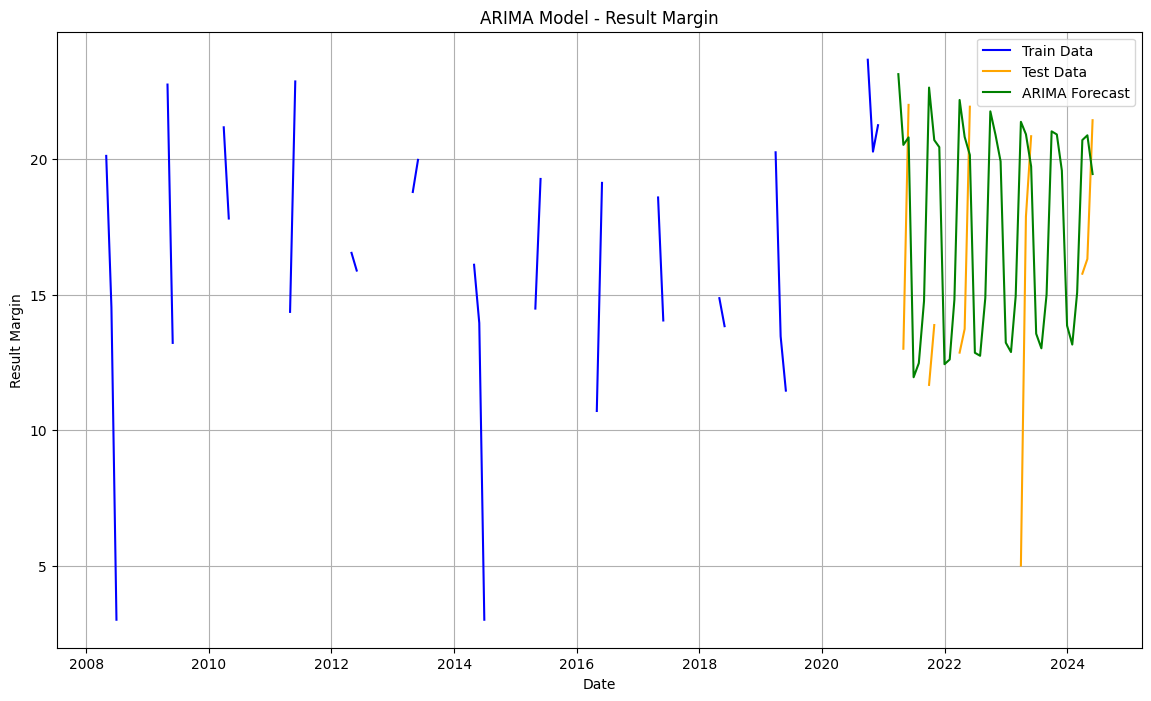

In [ ]:
# Plot ARIMA results
plt.figure(figsize=(14, 8))
plt.plot(train_data, label='Train Data', color='blue')
plt.plot(test_data, label='Test Data', color='orange')
plt.plot(test_data.index, arima_forecast, label='ARIMA Forecast', color='green')
plt.title('ARIMA Model - Result Margin')
plt.xlabel('Date')
plt.ylabel('Result Margin')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Fit SARIMA model
sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))
sarima_fit = sarima_model.fit(disp=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
# Forecast
sarima_forecast = sarima_fit.forecast(steps=len(test_data))

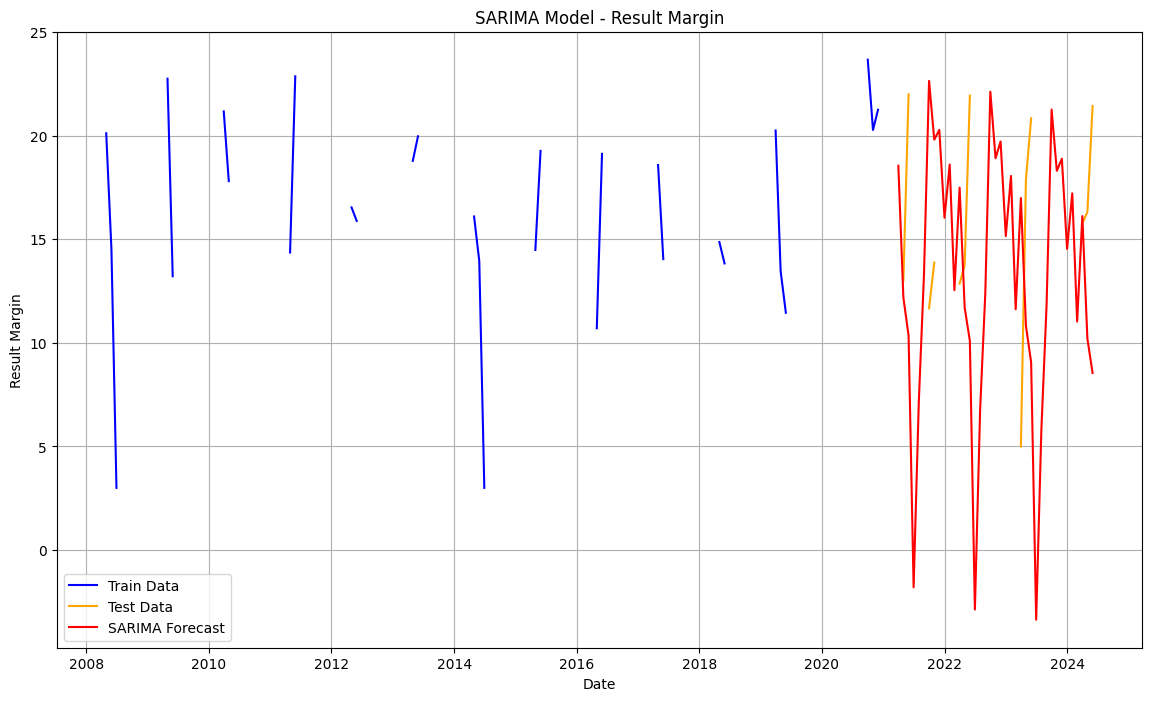

In [ ]:
# Plot SARIMA results
plt.figure(figsize=(14, 8))
plt.plot(train_data, label='Train Data', color='blue')
plt.plot(test_data, label='Test Data', color='orange')
plt.plot(test_data.index, sarima_forecast, label='SARIMA Forecast', color='red')
plt.title('SARIMA Model - Result Margin')
plt.xlabel('Date')
plt.ylabel('Result Margin')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# ARIMA and SARIMA Modeling for total_runs
# Train-test split
train_size = int(len(total_runs_series) * 0.8)
train_data = total_runs_series[:train_size]
test_data = total_runs_series[train_size:]

In [ ]:

# Fit ARIMA model
arima_model = ARIMA(train_data, order=(5, 1, 0))
arima_fit = arima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Forecast
arima_forecast = arima_fit.forecast(steps=len(test_data))

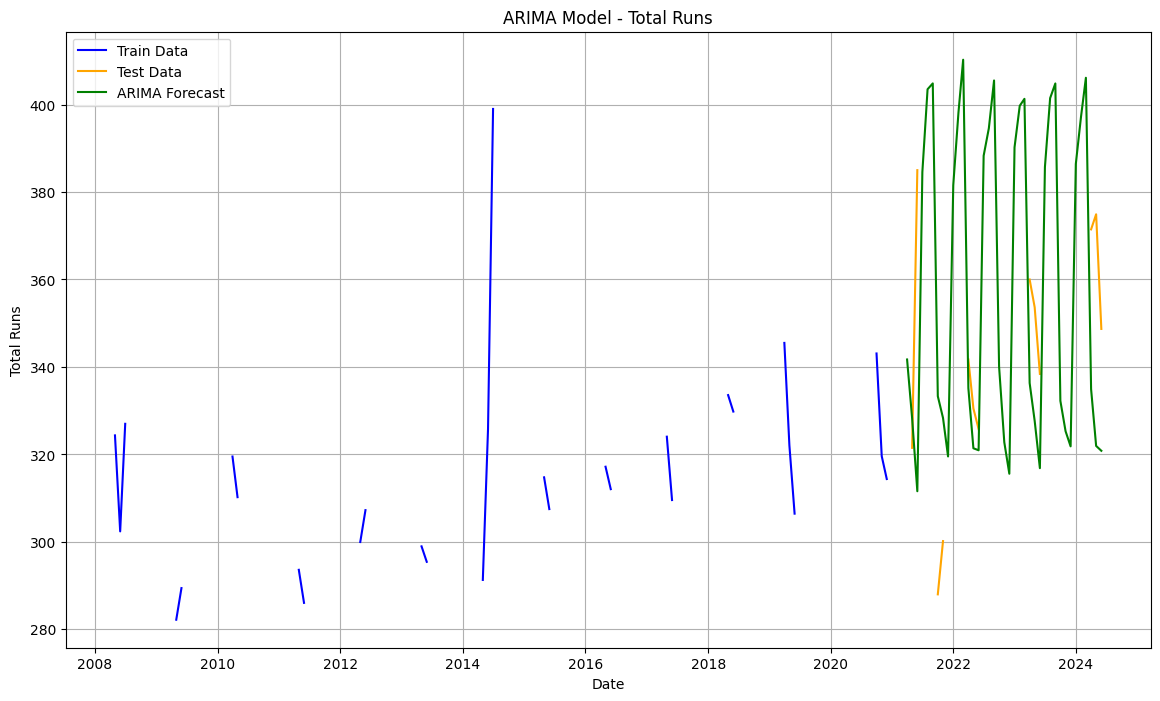

In [ ]:
# Plot ARIMA results
plt.figure(figsize=(14, 8))
plt.plot(train_data, label='Train Data', color='blue')
plt.plot(test_data, label='Test Data', color='orange')
plt.plot(test_data.index, arima_forecast, label='ARIMA Forecast', color='green')
plt.title('ARIMA Model - Total Runs')
plt.xlabel('Date')
plt.ylabel('Total Runs')
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


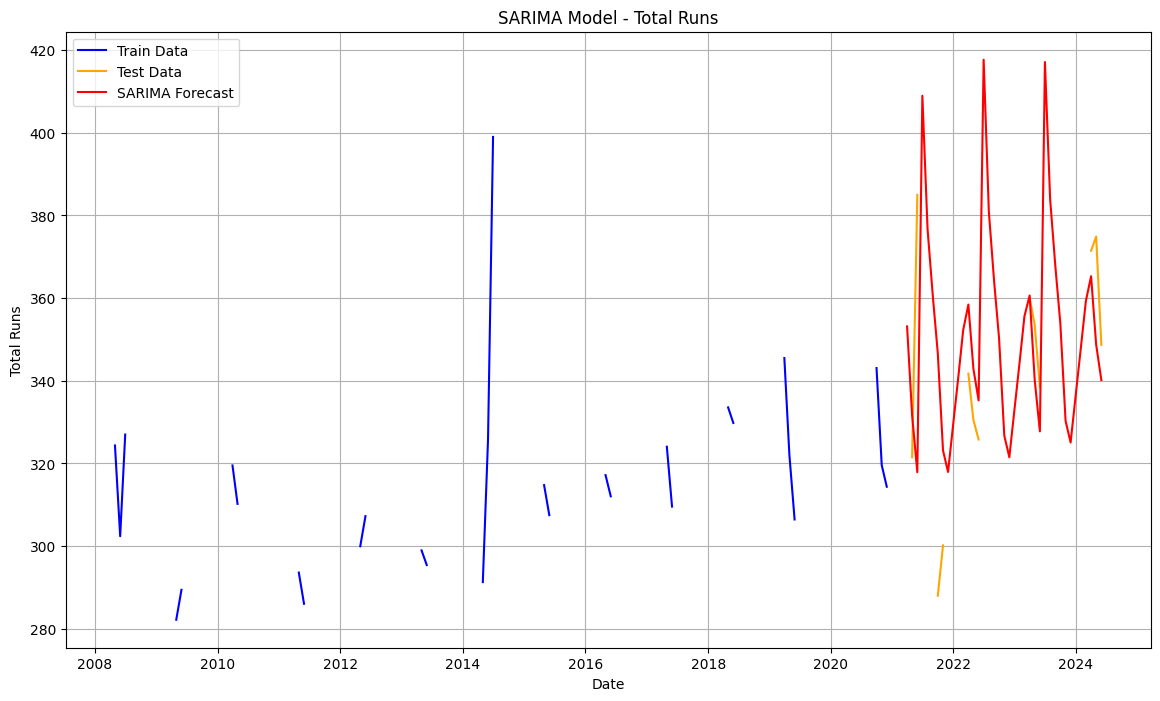

In [ ]:
#sarima
# Fit SARIMA model
sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))
sarima_fit = sarima_model.fit(disp=False)

# Forecast
sarima_forecast = sarima_fit.forecast(steps=len(test_data))

# Plot SARIMA results
plt.figure(figsize=(14, 8))
plt.plot(train_data, label='Train Data', color='blue')
plt.plot(test_data, label='Test Data', color='orange')
plt.plot(test_data.index, sarima_forecast, label='SARIMA Forecast', color='red')
plt.title('SARIMA Model - Total Runs')
plt.xlabel('Date')
plt.ylabel('Total Runs')
plt.legend()
plt.grid()
plt.show()


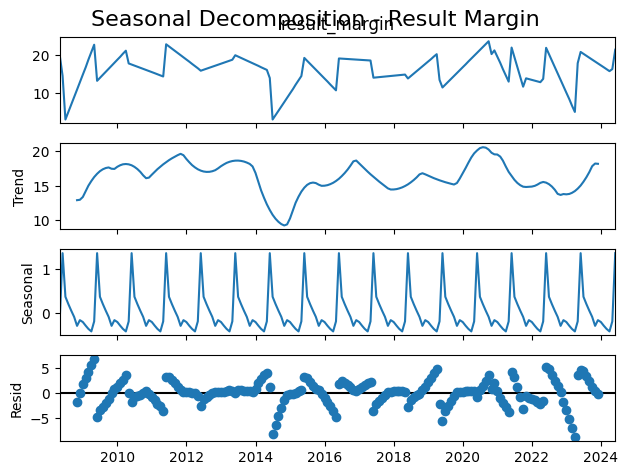

In [ ]:
# Impute missing values in result_margin_series using linear interpolation
result_margin_series = result_margin_series.interpolate(method='linear')

# Perform seasonal decomposition
decomposition = seasonal_decompose(result_margin_series, model='additive', period=12)
decomposition.plot()
plt.suptitle('Seasonal Decomposition - Result Margin', fontsize=16)
plt.show()

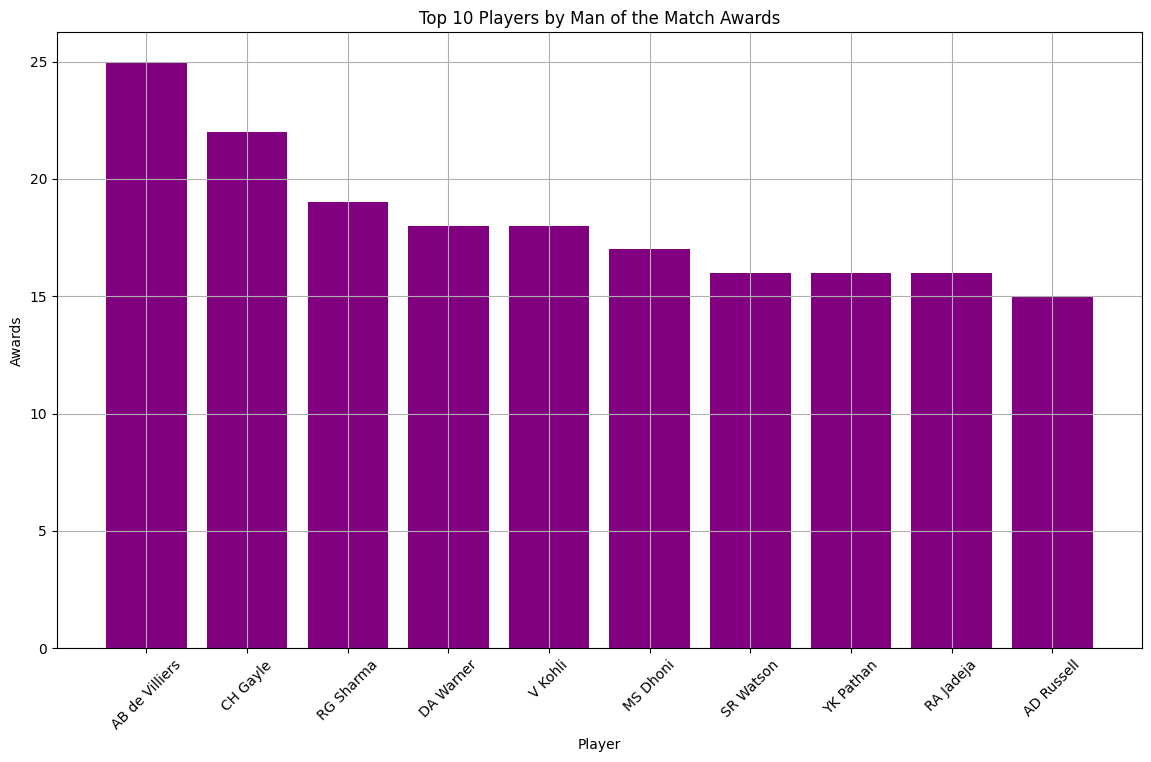

In [ ]:
#Top 10 Players by Man of the Match Awards
top_players = matches['player_of_match'].value_counts().head(10)
plt.figure(figsize=(14, 8))
plt.bar(top_players.index, top_players.values, color='purple')
plt.title('Top 10 Players by Man of the Match Awards')
plt.xlabel('Player')
plt.ylabel('Awards')
plt.xticks(rotation=45)
plt.grid()
plt.show()


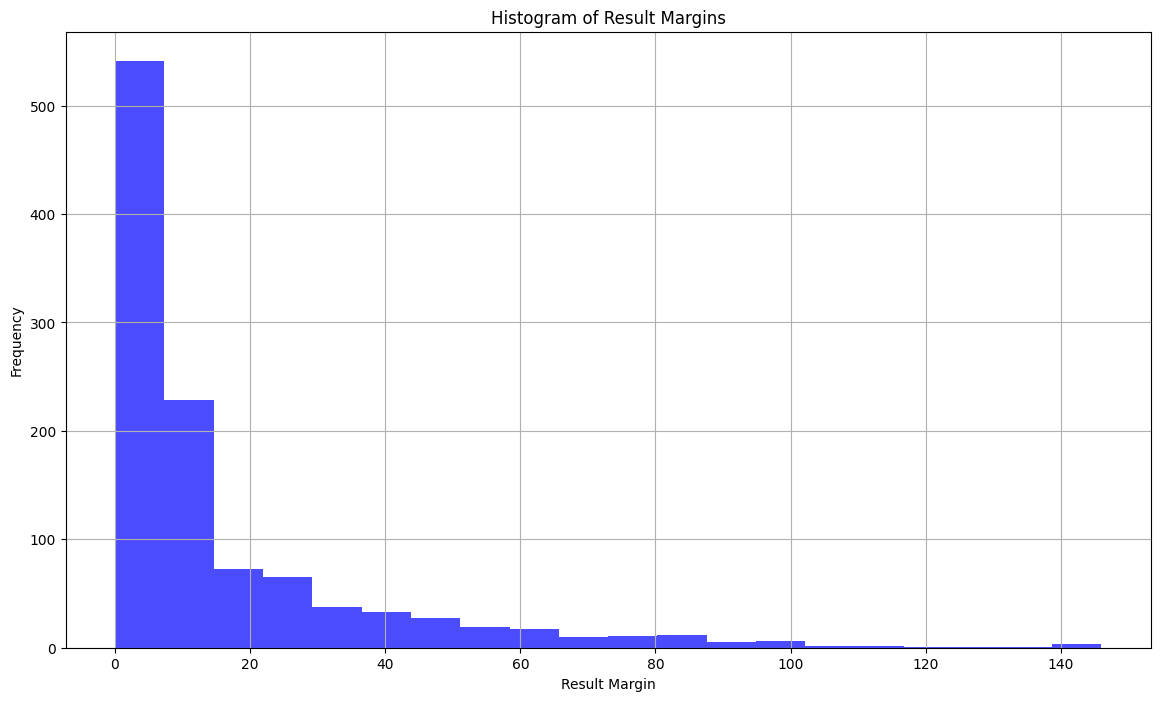

In [ ]:
#Histogram of result_margin
plt.figure(figsize=(14, 8))
plt.hist(matches['result_margin'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Result Margins')
plt.xlabel('Result Margin')
plt.ylabel('Frequency')
plt.grid()
plt.show()
